# Tick Strategy
_Version 0.1_

In [612]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from datetime import datetime, timedelta
import os
warnings.simplefilter("ignore")

# load our helper functios
import simtools as st
import tick as tk

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [1538]:
tickfile = 'Data/IBM-TAQ-oct19_full_day.zip' 
tickfile = 'Data/IBM-TAQ-nov26.zip'
tickname = 'IBM'

#tickfile = 'Data/TSLA-TAQ-aug19_full_day.zip'
#tickname = 'TSLA'

#tickfile = 'Data/ED-TAQ-oct19_full_day.zip' 
#tickfile = 'Data/ED-TAQ-nov26.zip'
#tickname = 'ED'

#tickfile = 'Data/TSG-TAQ-sep18.zip'
#tickname = 'TSG'

#tickfile = 'Data/BIIB-TAQ-nov19.zip'
#tickfile = 'Data/BIIB-TAQ-jul.zip'
#tickname = 'BIIB'

tickfile = 'Data/ABBV-TAQ-nov26.zip'
tickfile = 'Data/ABBV-TAQ-mar.zip'
tickname = 'ABBV'

#tickfile = 'Data/AAPL-TAQ-oct19_full_day.zip'
#tickname = 'AAPL'

tickfile = 'Data/XOM-TAQ-nov26.zip'
tickname = 'XOM'

taq = pd.read_pickle(tickfile)

In [1539]:
# filter on date
day = taq
day = day.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')

## Run the Simulator

In [1540]:
day

,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
index,,,,,,,,,,,,,,,
2019-11-26 09:30:00.012710798,T,68.63,1.0,69.23,1.0,R,1.167900e+07,A,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 09:30:00.025761890,M,0.00,0.0,69.10,10.0,R,1.168560e+07,A,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 09:30:00.028233149,T,68.63,1.0,69.23,2.0,R,1.168820e+07,A,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 09:30:00.028954972,A,0.00,0.0,69.10,1.0,R,1.168880e+07,A,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 09:30:00.133466840,T,68.91,1.0,69.23,2.0,R,1.170260e+07,A,NaN,C,XOM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26 15:59:59.964276453,N,68.73,1.0,68.74,2556.0,R,1.780163e+09,U,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 15:59:59.966467714,N,68.73,136.0,68.74,2556.0,R,1.780168e+09,G,NaN,C,XOM,NaN,NaN,NaN,NaN
2019-11-26 15:59:59.982368018,T,68.73,5.0,68.75,5.0,R,1.780204e+09,A,NaN,C,XOM,NaN,NaN,NaN,NaN


In [1541]:
results = tk.algo_loop(day, factors_included = [1,3,4,5,6,7,8], coef_included = [1.5,6e-5,1.5,1.5,1.5,1.8,1], limit_orders_included = True )

2019-12-03 16:58:45:460614: Beginning Tick Strategy run
Average stock spread for sample: 0.0102
2019-12-03 16:58:47:054700: starting main loop
2019-11-26 09:30:00.466711121 no midpoint. b:0 a:0
-534.0
Trade! 2019-11-26 09:35:00.030461608 68.69 534.0 0
-522.0
Trade! 2019-11-26 10:02:00.028275411 68.96 522.0 0
Closing Position
Trade! 2019-11-26 10:05:00.047874887 68.94 534.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:03.935792609 68.93 57.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531438338 68.93 1.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531495102 68.93 32.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531528907 68.93 8.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531631868 68.93 45.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531648695 68.93 26.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531763953 68.93 2.0 0
Limit buy @ 68.930
Trade! 2019-11-26 10:14:05.531809600 68.93 115.0 0
Trade! 2019-11-26 10:14:47.956132627 68.88 439.0 0
Limit buy @ 68.860
Tr

Limit sell @ 68.560
Trade! 2019-11-26 13:46:18.203266608 68.56 50.0 0
Limit sell @ 68.570
Trade! 2019-11-26 13:46:21.019575182 68.57 50.0 0
Closing Position
Trade! 2019-11-26 14:04:00.156942566 68.59 448.0 0
Trade! 2019-11-26 14:48:53.037954546 68.7 485.0 0
Trade! 2019-11-26 14:50:13.668617632 68.76 412.0 0
Trade! 2019-11-26 15:00:47.955814245 68.71 484.0 0
Limit sell @ 68.530
Trade! 2019-11-26 15:26:00.217600692 68.53 100.0 0
Limit sell @ 68.530
Trade! 2019-11-26 15:26:02.865094834 68.53 5.0 0
Limit sell @ 68.530
Trade! 2019-11-26 15:26:03.323024440 68.53 13.0 0
Trade! 2019-11-26 15:36:16.099535080 68.61 417.0 0
Trade! 2019-11-26 15:39:55.300900227 68.55 482.0 0
Trade! 2019-11-26 15:41:51.567843030 68.59 418.0 0
Trade! 2019-11-26 15:44:14.145203301 68.55 481.0 0
Trade! 2019-11-26 15:48:03.668079397 68.61 419.0 0
Trade! 2019-11-26 15:57:25.725835438 68.71 478.0 0
Trade! 2019-11-26 15:59:45.597008110 68.75 419.0 0
Trade! 2019-11-26 15:59:45.637522619 68.75 412.0 0
2019-12-03 17:27:05:85



## What trades happen

In [1542]:
trade_df = results['trades']
trade_df.head()

,price,shares,bar,trade_type,side
index,,,,,
2019-11-26 09:35:00.030461608,68.69,534,0,a,s
2019-11-26 10:02:00.028275411,68.96,522,0,a,s
2019-11-26 10:05:00.047874887,68.94,534,0,a,b
2019-11-26 10:14:03.935792609,68.93,57,0,p,b
2019-11-26 10:14:05.531438338,68.93,1,0,p,b


## Number of shares traded passively and aggressively and number of trades performed passively and aggressively

In [1543]:
results['trades']['Number of trades'] = 1
m1 = results['trades'].groupby(['trade_type'])[['shares']].sum()
m2 = results['trades'].groupby(['trade_type'])[['Number of trades']].sum()
m3 = pd.merge(m1,m2,left_on = 'trade_type', right_on = 'trade_type')
m3

,shares,Number of trades
trade_type,,
a,25192.0,57
p,4299.0,85


## PNL Calculations

In [1544]:
net_position = results['net_position']

[total_pnl, intra_pnl_df, worst_intra,
best_intra, max_long, max_short, min_pnl, max_pnl,
min_shares_long, max_shares_long, min_shares_short, max_shares_short] = results['statistics']

In [1545]:
print('Total PnL: $%.3f' % (total_pnl) )
print('Worst Intraday PnL: $%.3f' % (worst_intra))
print('Best Intraday PnL: $%.3f' % (best_intra))
print('Worst PnL: $%.3f' % (min_pnl))
print('Best PnL: $%.3f' % (max_pnl))
print('Maximum Long Position (Shares): ', max_long)
print('Maximum Short Position (Shares): ', max_short)
print('Smallest buy trade: ', min_shares_long)
print('Biggest buy trade: ', max_shares_long)
print('Smallest sell trade: ', max_shares_short)
print('Biggest sell trade: ', min_shares_short)
print('Ending position: ', net_position)

Total PnL: $783.520
Worst Intraday PnL: $-310.500
Best Intraday PnL: $251.020
Worst PnL: $-154.740
Best PnL: $901.660
Maximum Long Position (Shares):  5099.0
Maximum Short Position (Shares):  -1890.0
Smallest buy trade:  1.0
Biggest buy trade:  580.0
Smallest sell trade:  -1.0
Biggest sell trade:  -580.0
Ending position:  2251.0


## Factor statistics

In [1546]:
risk_factors = results['risk_factors'][trade_df.index]
tick_factors = results['tick_factors'][trade_df.index]

In [1547]:
print('Largest risk factor %.6f' %(risk_factors.max()))
print('Smallest risk factor %.6f' %(risk_factors.min()))
print('Mean risk factor %.6f' %(risk_factors.mean()))
print('Median risk factor %.6f \n' %(risk_factors.median()))

print('Largest tick factor %.6f' %(tick_factors.max()))
print('Smallest tick factor %.6f' %(tick_factors.min()))
print('Mean tick factor %.6f' %(tick_factors.mean()))
print('Median tick factor %.6f' %(tick_factors.median()))

Largest risk factor 0.000547
Smallest risk factor -0.001531
Mean risk factor -0.000611
Median risk factor -0.000795 

Largest tick factor 0.000000
Smallest tick factor 0.000000
Mean tick factor 0.000000
Median tick factor 0.000000


## Fair values plot

In [1548]:
if not os.path.exists('Graphs'):
    os.makedirs('Graphs')

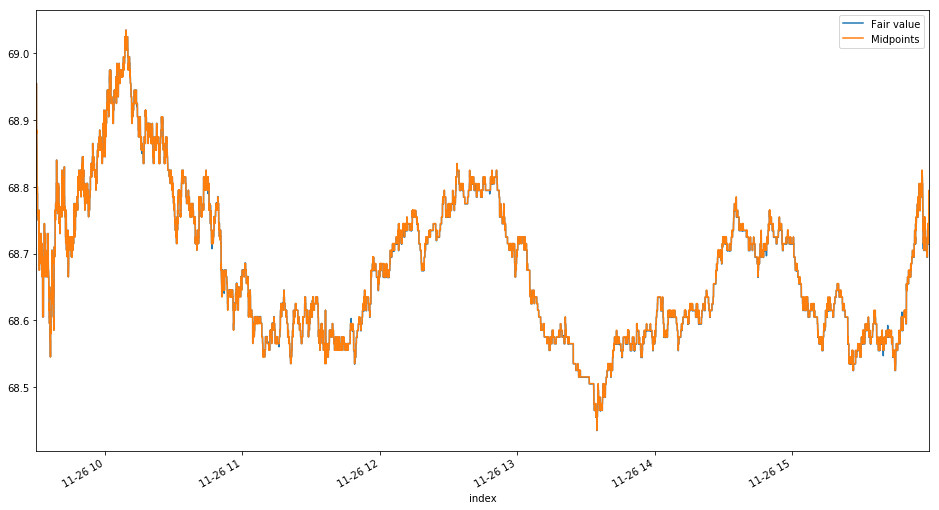

In [1549]:
results['fair_values'].dropna().plot(label = 'Fair value');
results['midpoints'].dropna().plot(label = 'Midpoints');
#results['bid_values'].dropna().plot(label = 'Bid Values', linewidth = 1.5, color='g');
#results['ask_values'].dropna().plot(label = 'Ask Values', linewidth = 1.5, color='r');
plt.legend()
plt.savefig('Graphs/' + tickname + '_fair_values.png', bbox_inches='tight')

## Plotting the first 500 risk factors against the net position at the same time

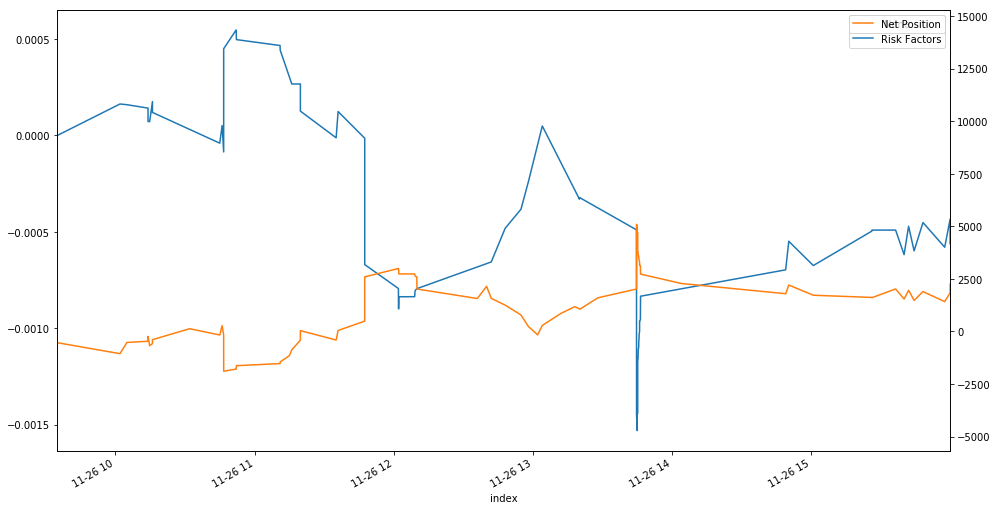

In [1550]:
risk_factors[:500].dropna().plot(label='Risk Factors')
plt.legend()
intra_pnl_df['cum_signed_shares'][:500].plot(secondary_y = True, label = 'Net Position').set_ylim(intra_pnl_df['cum_signed_shares'][:500].min()*3,intra_pnl_df['cum_signed_shares'][:500].max()*3)
plt.legend();
plt.savefig('Graphs/' + tickname + '_riskVsPosition.png', bbox_inches = 'tight')

## Net Position against Aggressive trades

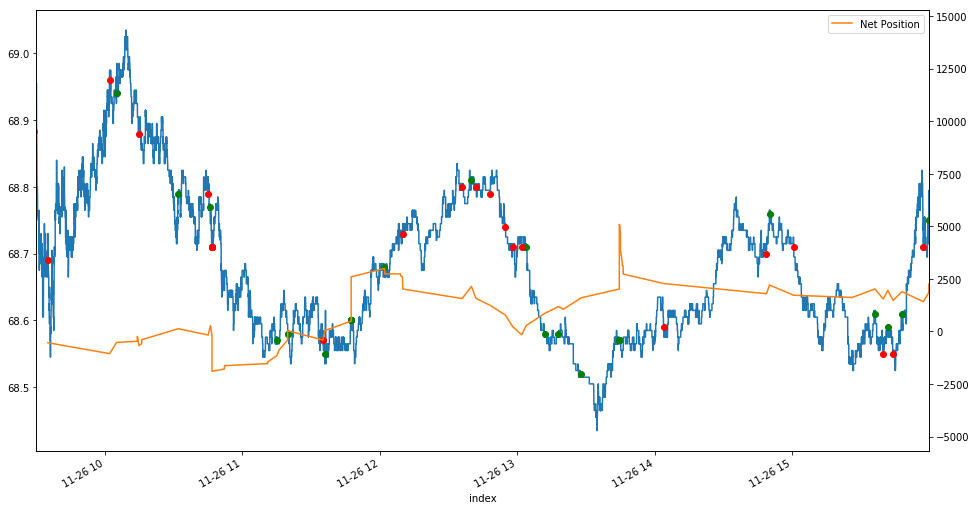

In [1551]:
results['midpoints'].dropna().plot( label = 'Midpoints')
intra_pnl_df['cum_signed_shares'].plot(secondary_y = True,label = 'Net Position').set_ylim(intra_pnl_df['cum_signed_shares'].min()*3,intra_pnl_df['cum_signed_shares'].max()*3);
plt.legend();
trade_df['price'][(trade_df['trade_type'] == 'a') & (trade_df['side'] == 'b')].plot( label = 'Aggressive Trades',marker='o',linestyle = 'None',color='g')
trade_df['price'][(trade_df['trade_type'] == 'a') & (trade_df['side'] == 's')].plot( label = 'Aggressive Trades',marker='o',linestyle = 'None',color='r')
plt.legend()
plt.savefig('Graphs/' + tickname + '_PositionVsAgressive.png', bbox_inches = 'tight')

## Midpoint of the price against the cumulative PNL

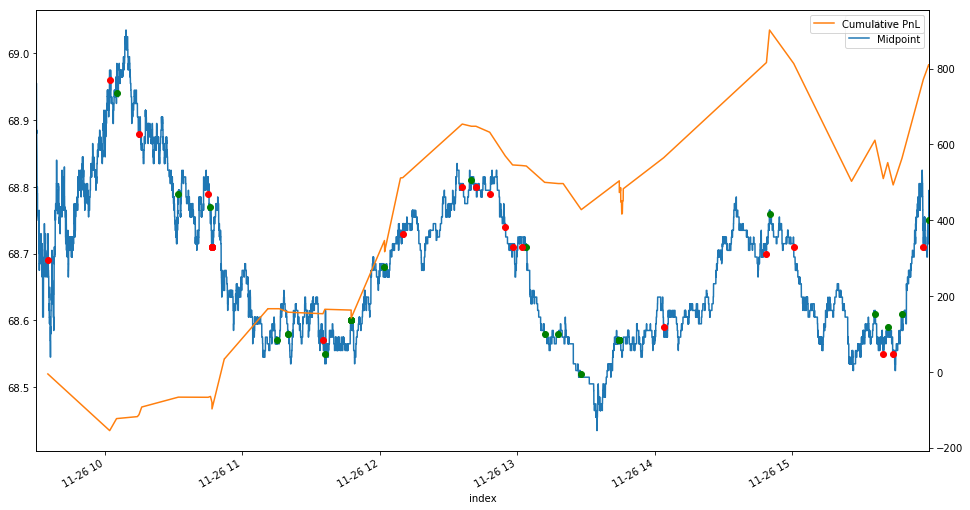

In [1552]:
results['midpoints'].dropna().plot(label = 'Midpoint');
plt.legend();
trade_df['price'][(trade_df['trade_type'] == 'a') & (trade_df['side'] == 'b')].plot( marker='o',linestyle = 'None',color='g')
trade_df['price'][(trade_df['trade_type'] == 'a') & (trade_df['side'] == 's')].plot( marker='o',linestyle = 'None',color='r')
intra_pnl_df['cum_pnl'].plot(secondary_y = True, style='-', label = 'Cumulative PnL');
plt.legend();
plt.savefig('Graphs/' + tickname + '_midpointsVsCumPnL.png', bbox_inches = 'tight')

## Calculating trades for a single candlestick factor (choose from [4,5,6,7,8])

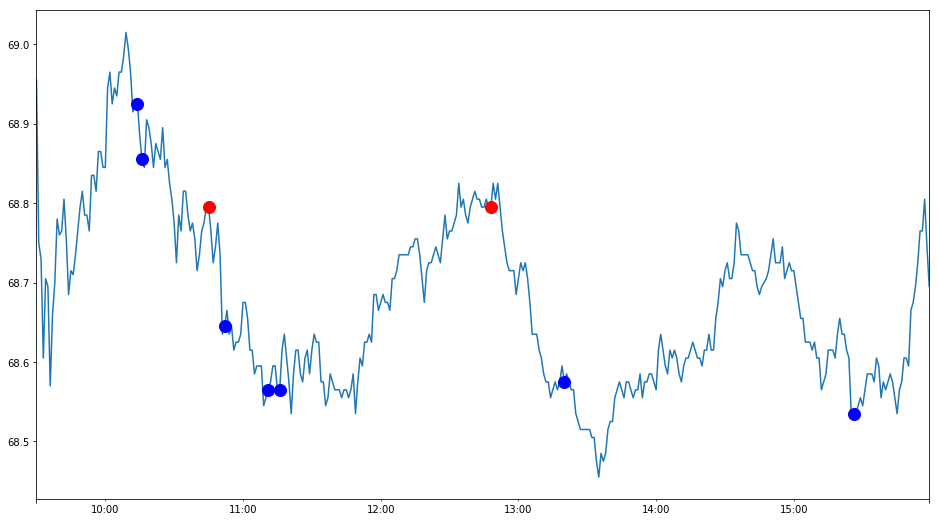

In [1566]:
df = pd.DataFrame(columns = ['midpoint'], index = results['midpoints'].index)
df['midpoint'] = results['midpoints']
df = df.dropna()
df = df.groupby([df.index.hour,df.index.minute]).first()

Factor_number = 8

df1 = pd.DataFrame( index = results['candlestick_indicators'].index[:-1], columns = ['midpoint'])
df1['midpoint'] = df['midpoint'].values
df1['midpoint'].plot()
df2 = pd.DataFrame(np.abs((results['candlestick_indicators'][Factor_number]*df1['midpoint'])), columns = ['midpoint'])
df2['midpoint'][df2['midpoint'] == 0] = None
df2['trades'] = results['candlestick_indicators']['trades']
df2=df2.astype(float)
df2['midpoint'][df2['trades'] == 1].plot(marker = 'o', color = 'g',linestyle = 'None', markersize=12);
df2['midpoint'][df2['trades'] == 0].plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12);
df2['midpoint'][df2['trades'] == -1].plot(marker = 'o', color = 'r',linestyle = 'None', markersize=12);
plt.savefig('Graphs/' + tickname + '_SingleCandlesticksOnPrice5.png', bbox_inches = 'tight')

## Plot all candlestick trades together

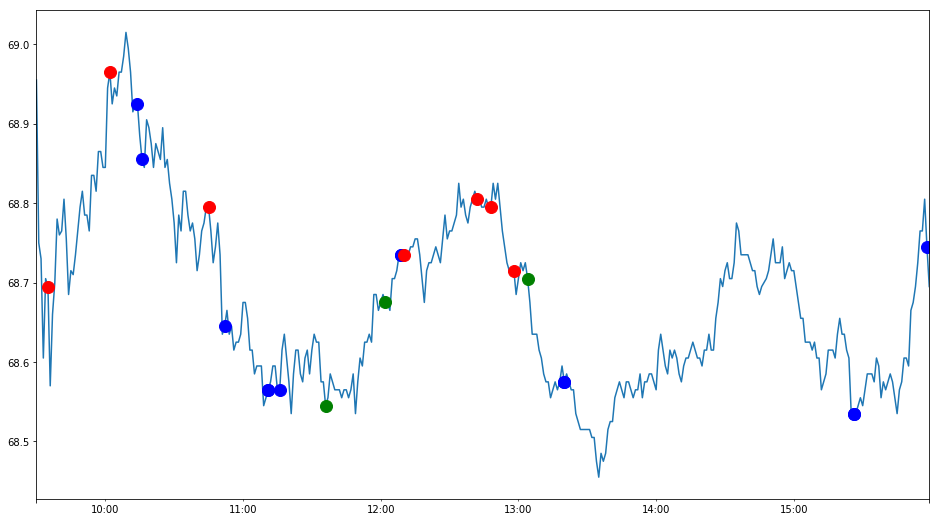

In [1567]:
df1['midpoint'].plot()
df2 = pd.DataFrame((results['candlestick_indicators'][4]*df1['midpoint']), columns = ['c1'])
df2['c2'] = results['candlestick_indicators'][5]*df1['midpoint']
df2['c3'] = results['candlestick_indicators'][6]*df1['midpoint']
df2['c4'] = results['candlestick_indicators'][7]*df1['midpoint']
df2['c5'] = results['candlestick_indicators'][8]*df1['midpoint']
df2['c1'][df2['c1'] == 0] = np.nan
df2['c2'][df2['c2'] == 0] = np.nan
df2['c3'][df2['c3'] == 0] = np.nan
df2['c4'][df2['c4'] == 0] = np.nan
df2['c5'][df2['c5'] == 0] = np.nan
df2['trades'] = results['candlestick_indicators']['trades']
np.abs(df2['c1'][df2['trades'] == 1]).plot(marker = 'o', color = 'g',linestyle = 'None', markersize=12)
np.abs(df2['c1'][df2['trades'] == 0]).plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12)
np.abs(df2['c2'][df2['trades'] == 1]).plot(marker = 'o', color = 'g',linestyle = 'None', markersize=12)
np.abs(df2['c2'][df2['trades'] == 0]).plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12)
np.abs(df2['c3'][df2['trades'] == 1]).plot(marker = 'o', color = 'g',linestyle = 'None', markersize=12)
np.abs(df2['c3'][df2['trades'] == 0]).plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12)
np.abs(df2['c4'][df2['trades'] == 0]).plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12)
np.abs(df2['c4'][df2['trades'] == -1]).plot(marker = 'o', color = 'r',linestyle = 'None', markersize=12)
np.abs(df2['c5'][df2['trades'] == 0]).plot(marker = 'o', color = 'b',linestyle = 'None', markersize=12)
np.abs(df2['c5'][df2['trades'] == -1]).plot(marker = 'o', color = 'r',linestyle = 'None', markersize=12)
plt.savefig('Graphs/' + tickname + '_MultipleCandlesticksOnPrice.png', bbox_inches = 'tight')

## Plot the strength of all the factors that are being used (Needs modification since you must comment out if number of trades for a candlestick was 0)

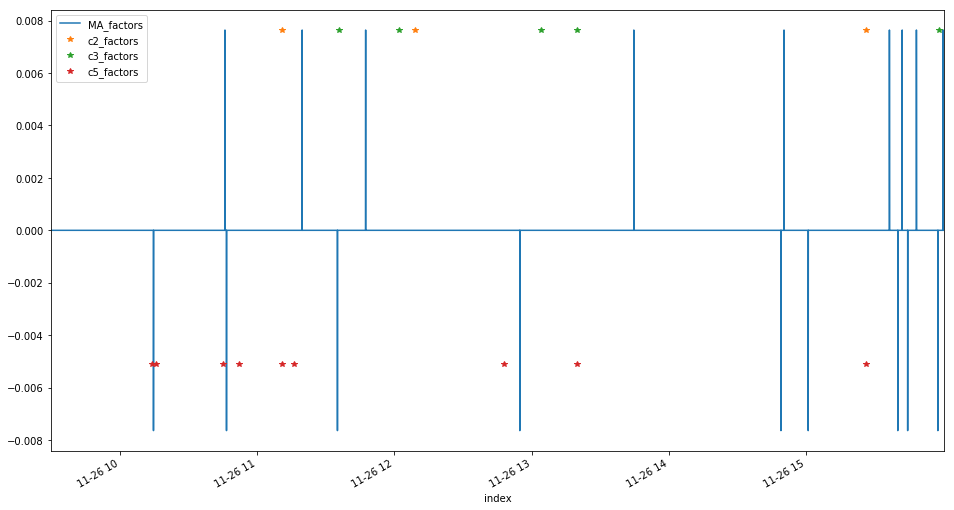

In [1568]:
results['ma_factors'].dropna().plot(label = 'MA_factors');
#results['c1_factors'][results['c1_factors']>0].plot(label = 'c1_factors', marker='*',linestyle = 'None');
results['c2_factors'][results['c2_factors']>0].plot(label = 'c2_factors', marker='*',linestyle = 'None');
results['c3_factors'][results['c3_factors']>0].plot(label = 'c3_factors', marker='*',linestyle = 'None');
#results['c4_factors'][results['c4_factors']>0].plot(label = 'c4_factors', marker='*',linestyle = 'None');
results['c5_factors'][results['c5_factors']<0].plot(label = 'c5_factors', marker='*',linestyle = 'None');
plt.legend();
plt.savefig('Graphs/' + tickname + '_factorsComparison.png', bbox_inches = 'tight')

## Plots the moving average on the price of the stocke (5min and 20min)

In [ ]:
results['ma_df']['MA_ST'].dropna().plot(label = 'Short Term MA (5 Day)')
results['ma_df']['MA_LT'].dropna().plot(label = 'Long Term MA (20 Day)')
results['midpoints'].dropna().plot( label = 'Midpoints')
plt.legend()
plt.savefig('Graphs/' + tickname + '_MovingAverage.png', bbox_inches = 'tight')

In [1570]:
results['candlestick_indicators']

,4,5,6,7,8,trades
2019-11-26 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26 09:33:00,0,0,0,0,0,0
2019-11-26 09:34:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2019-11-26 15:56:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26 15:57:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-26 15:58:00,0,0,1,0,0,0
2019-11-26 15:59:00,NaN,NaN,NaN,NaN,NaN,NaN
